In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\DOCUMENTS AND LECTURES\BS ECO\MetroLiving_Data new.csv')

In [3]:
df.head()

,neighborhood,property_type,units,avg_size,distance_to_public_transport,distance_to_schools,distance_to_park,recent_sale_price,year_built,crime_rate
0,Columbia Heights,Condominium,21,1571.0,0.67,0.72,0.99,1739228.0,1967,5.7
1,Petworth,Townhouse,24,1173.0,0.17,0.80,0.83,NaN,1990,12.1
2,U Street Corridor,Single Family Home,32,980.0,0.75,0.66,0.91,701071.0,2011,5.2
3,Adams Morgan,Townhouse,14,1241.0,0.41,0.48,0.49,1186984.0,1968,20.7
4,Dupont Circle,Townhouse,11,817.0,0.63,0.45,0.58,1869701.0,2015,16.1


In [4]:
print(df.isnull().sum())

neighborhood                      0
property_type                     0
units                             0
avg_size                         13
distance_to_public_transport      0
distance_to_schools               0
distance_to_park                  0
recent_sale_price               238
year_built                        0
crime_rate                        0
dtype: int64


In [5]:
columns_to_fill=['avg_size' , 'recent_sale_price']

In [6]:
mean_values=df[columns_to_fill].mean()

In [7]:
df[columns_to_fill] = df[columns_to_fill].fillna(mean_values)

In [8]:
print(df.isnull().sum())

neighborhood                    0
property_type                   0
units                           0
avg_size                        0
distance_to_public_transport    0
distance_to_schools             0
distance_to_park                0
recent_sale_price               0
year_built                      0
crime_rate                      0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighborhood                  2000 non-null   object 
 1   property_type                 2000 non-null   object 
 2   units                         2000 non-null   int64  
 3   avg_size                      2000 non-null   float64
 4   distance_to_public_transport  2000 non-null   float64
 5   distance_to_schools           2000 non-null   float64
 6   distance_to_park              2000 non-null   float64
 7   recent_sale_price             2000 non-null   float64
 8   year_built                    2000 non-null   int64  
 9   crime_rate                    2000 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 156.4+ KB


In [10]:
df['proximity_to_public_transport'] = 1 / df['distance_to_public_transport']
df['proximity_to_schools'] = 1 / df['distance_to_schools']
df['proximity_to_park'] = 1 / df['distance_to_park']

In [11]:
df.describe()

,units,avg_size,distance_to_public_transport,distance_to_schools,distance_to_park,recent_sale_price,year_built,crime_rate,proximity_to_public_transport,proximity_to_schools,proximity_to_park
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,21.611000,1204.308505,0.493650,0.549545,0.537540,1.258785e+06,1985.325000,15.05290,2.828290,2.569807,2.611072
std,11.025264,186.391188,0.234007,0.262183,0.256793,4.022823e+05,20.500427,5.74486,1.976725,1.857167,1.878121
min,3.000000,700.000000,0.100000,0.100000,0.100000,5.004110e+05,1950.000000,5.00000,1.111111,1.000000,1.000000
25%,12.000000,1077.000000,0.290000,0.320000,0.310000,9.451280e+05,1967.000000,10.00000,1.428571,1.298701,1.315789
50%,22.000000,1204.308505,0.490000,0.540000,0.530000,1.258785e+06,1985.000000,15.10000,2.040816,1.851852,1.886792
75%,31.000000,1331.000000,0.700000,0.770000,0.760000,1.589086e+06,2004.000000,20.00000,3.448276,3.125000,3.225806
max,40.000000,1873.000000,0.900000,1.000000,1.000000,1.996792e+06,2020.000000,25.00000,10.000000,10.000000,10.000000


D:\PYTHON - ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


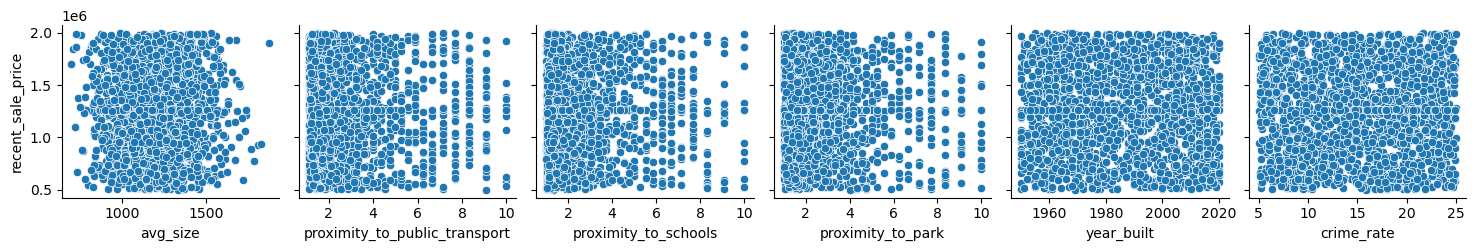

In [12]:
import seaborn as sns
sns.pairplot(df, x_vars=['avg_size', 'proximity_to_public_transport', 'proximity_to_schools' , 'proximity_to_park' , 'year_built', 'crime_rate'], y_vars=['recent_sale_price'], kind='scatter')
plt.show()

C:\Users\hassa\AppData\Local\Temp\ipykernel_3304\594477631.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='avg_size', y='recent_sale_price', data=df, ci='sd')


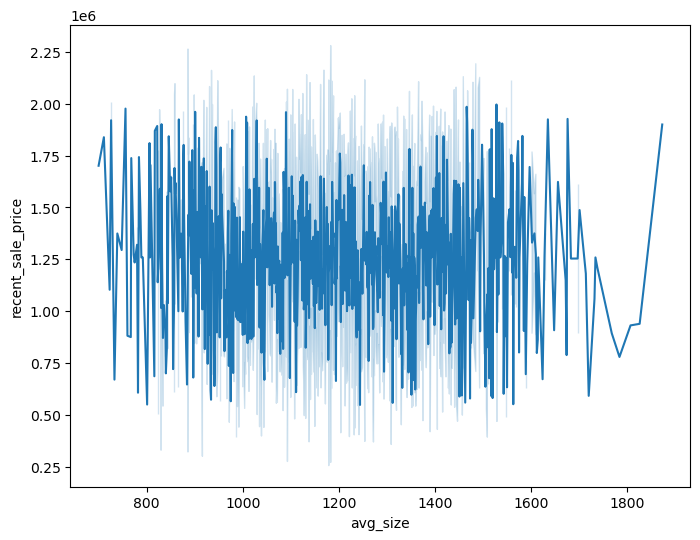

In [13]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='avg_size', y='recent_sale_price', data=df, ci='sd')
plt.show()

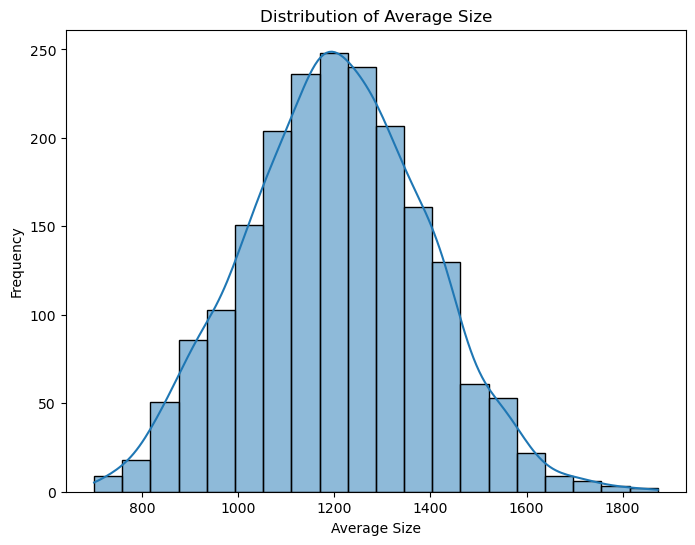

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='avg_size', bins=20, kde=True)
plt.xlabel('Average Size')
plt.ylabel('Frequency')
plt.title('Distribution of Average Size')
plt.show()

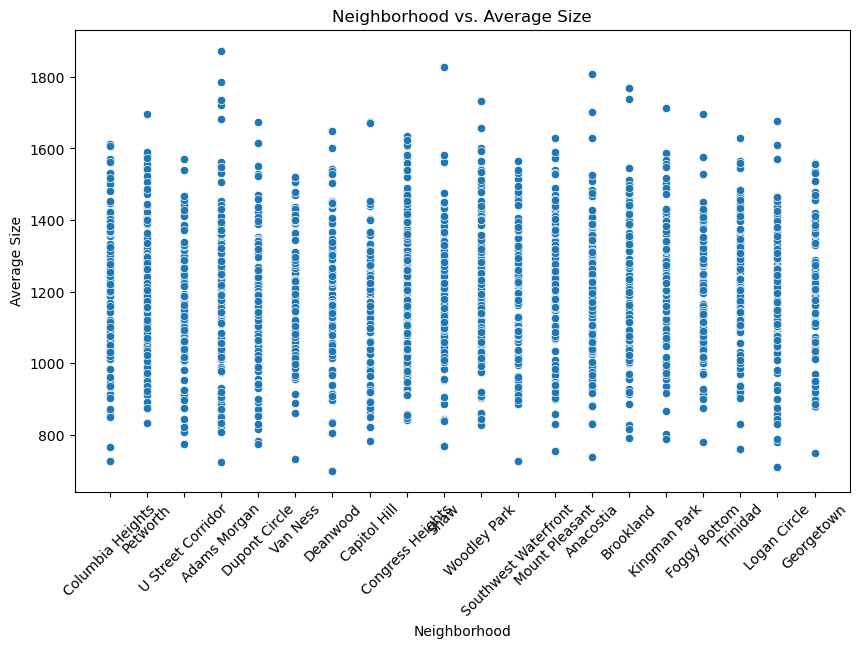

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='neighborhood', y='avg_size')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Average Size')
plt.title('Neighborhood vs. Average Size')
plt.show()

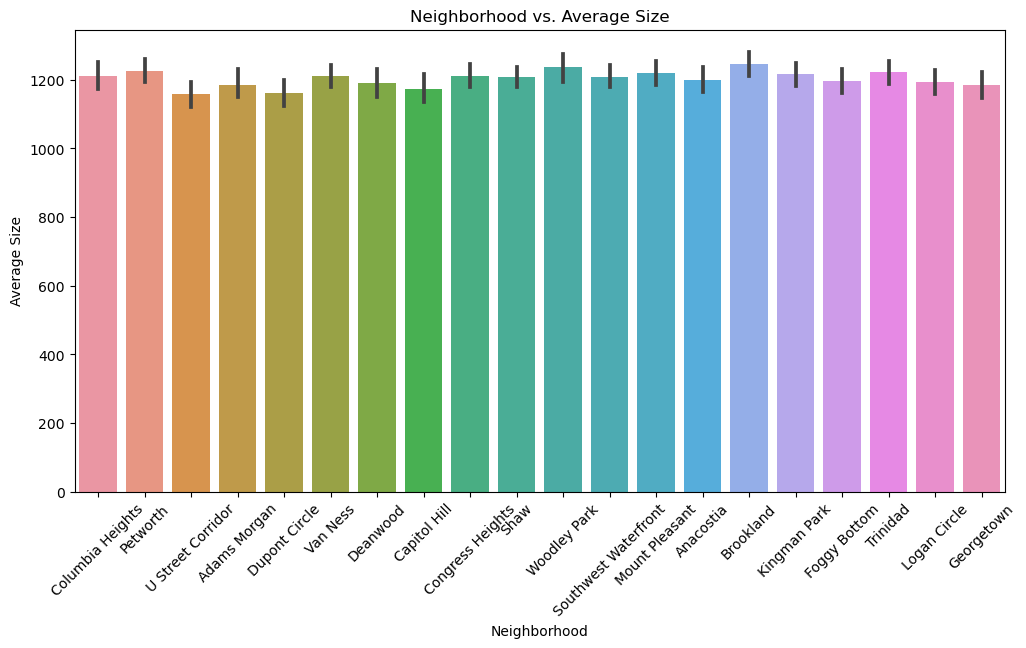

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='neighborhood', y='avg_size')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Average Size')
plt.title('Neighborhood vs. Average Size')
plt.show()

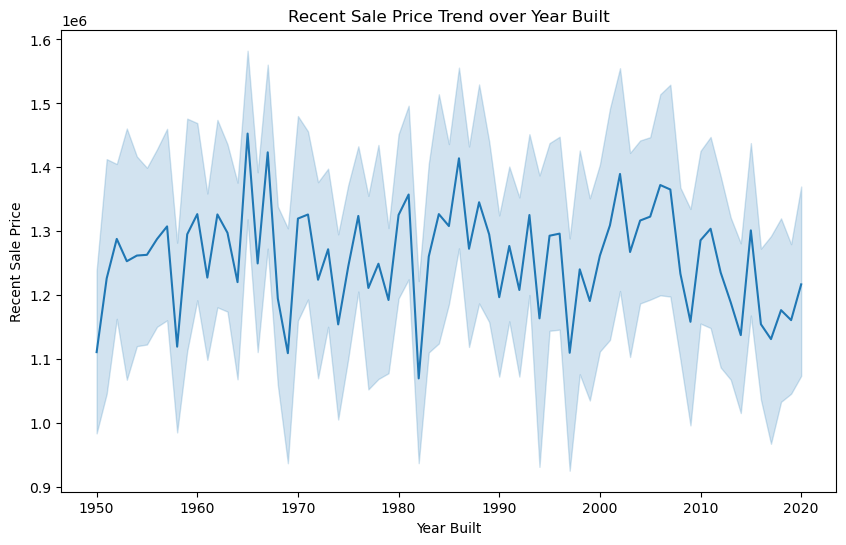

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_built', y='recent_sale_price', data=df)
plt.xlabel('Year Built')
plt.ylabel('Recent Sale Price')
plt.title('Recent Sale Price Trend over Year Built')
plt.show()

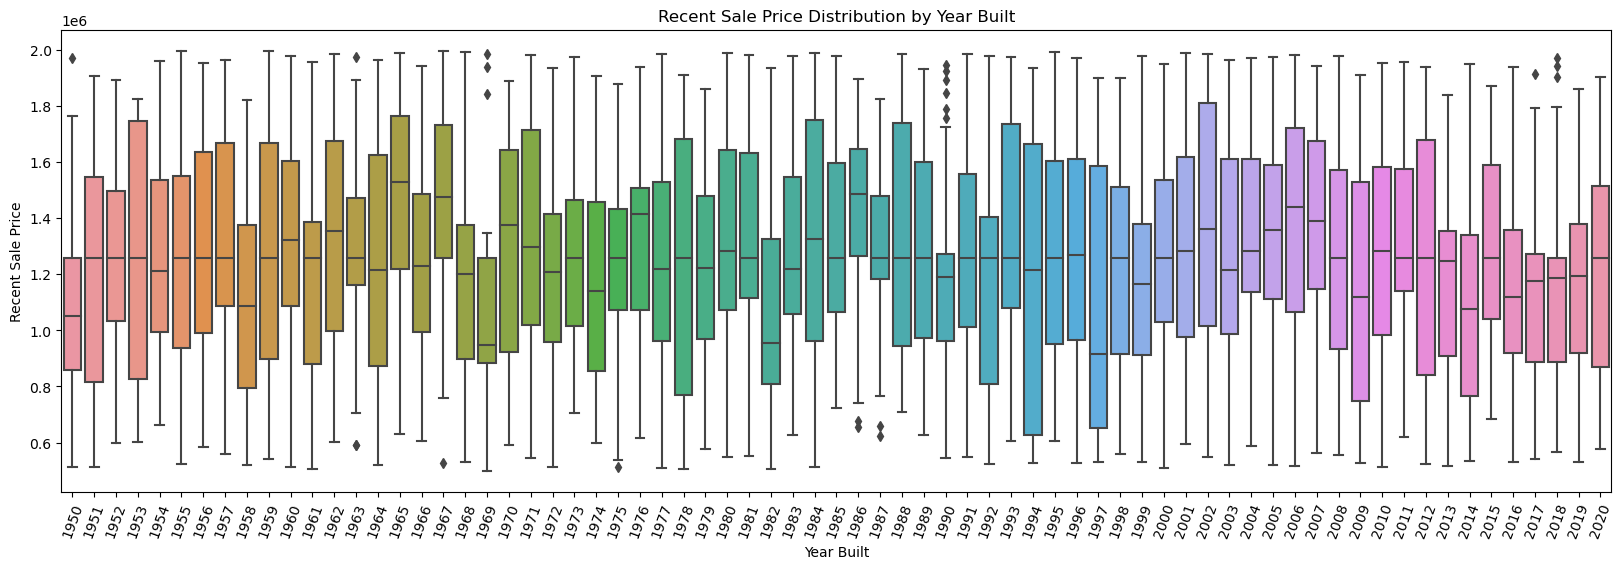

In [19]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='year_built', y='recent_sale_price', data=df)
plt.xlabel('Year Built')
plt.ylabel('Recent Sale Price')
plt.title('Recent Sale Price Distribution by Year Built')
plt.xticks(rotation=70)
plt.show()

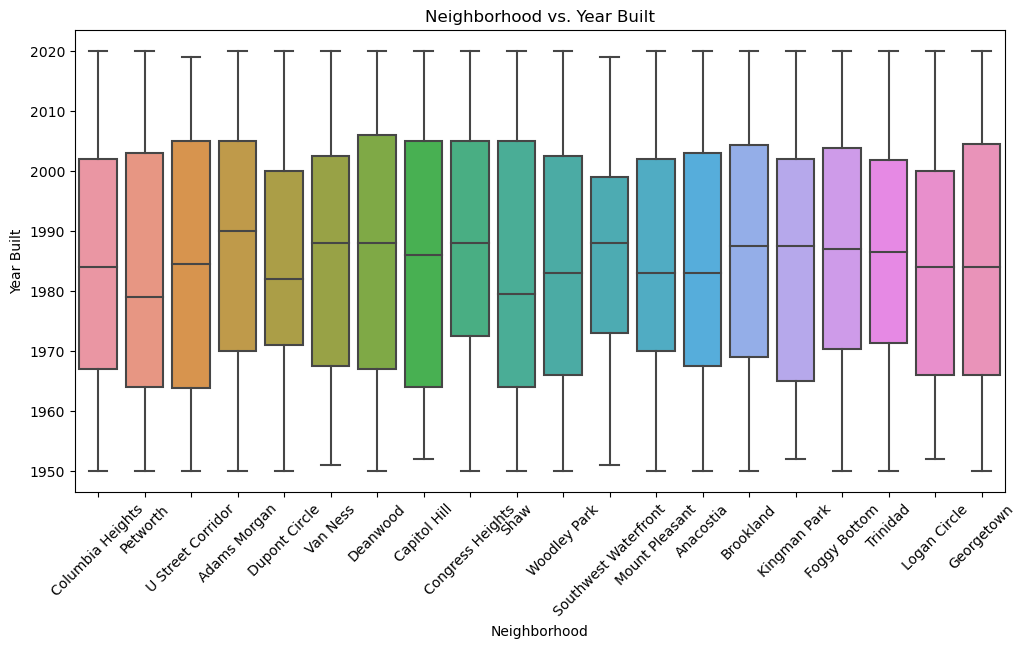

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='neighborhood', y='year_built')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Year Built')
plt.title('Neighborhood vs. Year Built')
plt.show()

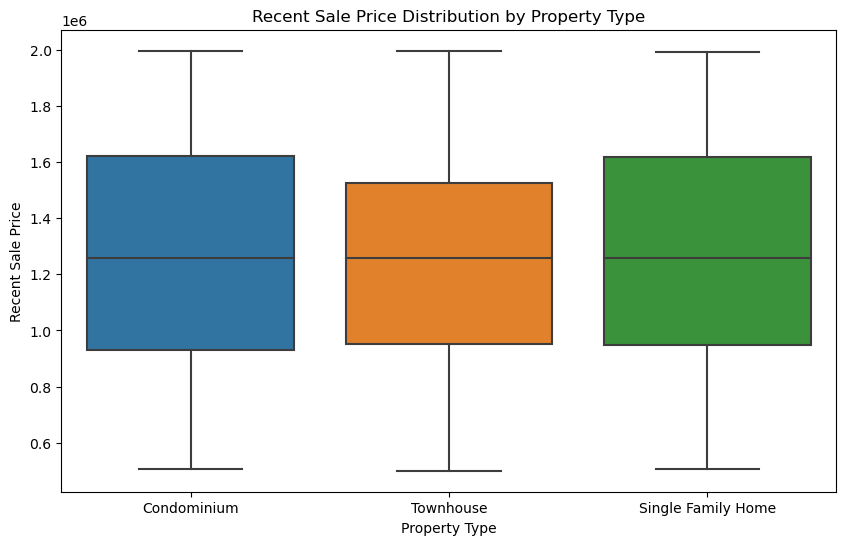

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='recent_sale_price', data=df)
plt.xlabel('Property Type')
plt.ylabel('Recent Sale Price')
plt.title('Recent Sale Price Distribution by Property Type')
plt.show()

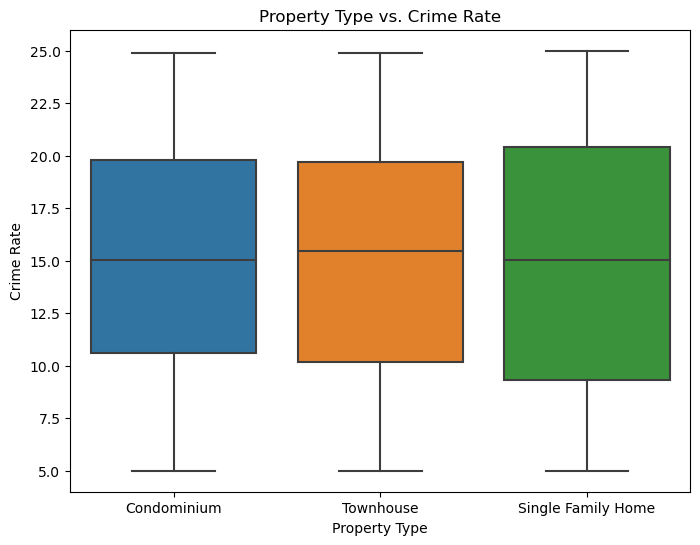

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='property_type', y='crime_rate')
plt.xlabel('Property Type')
plt.ylabel('Crime Rate')
plt.title('Property Type vs. Crime Rate')
plt.show()

C:\Users\hassa\AppData\Local\Temp\ipykernel_3304\2388284159.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x='property_type', y='units', ci=None)


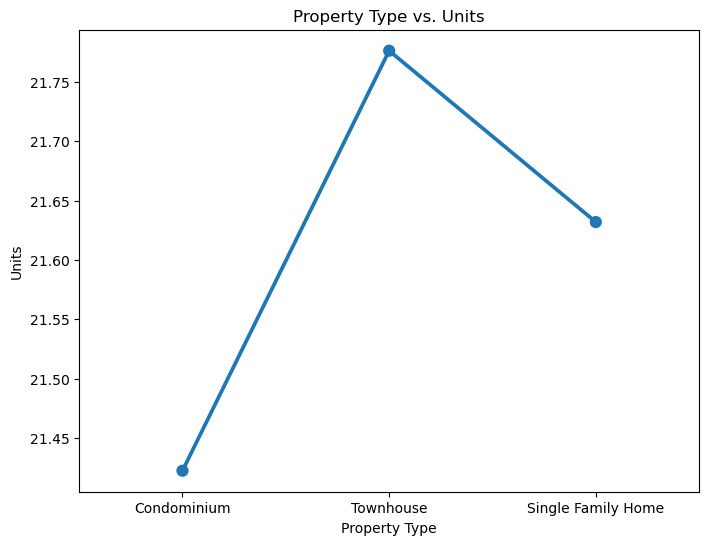

In [23]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='property_type', y='units', ci=None)
plt.xlabel('Property Type')
plt.ylabel('Units')
plt.title('Property Type vs. Units')
plt.show()

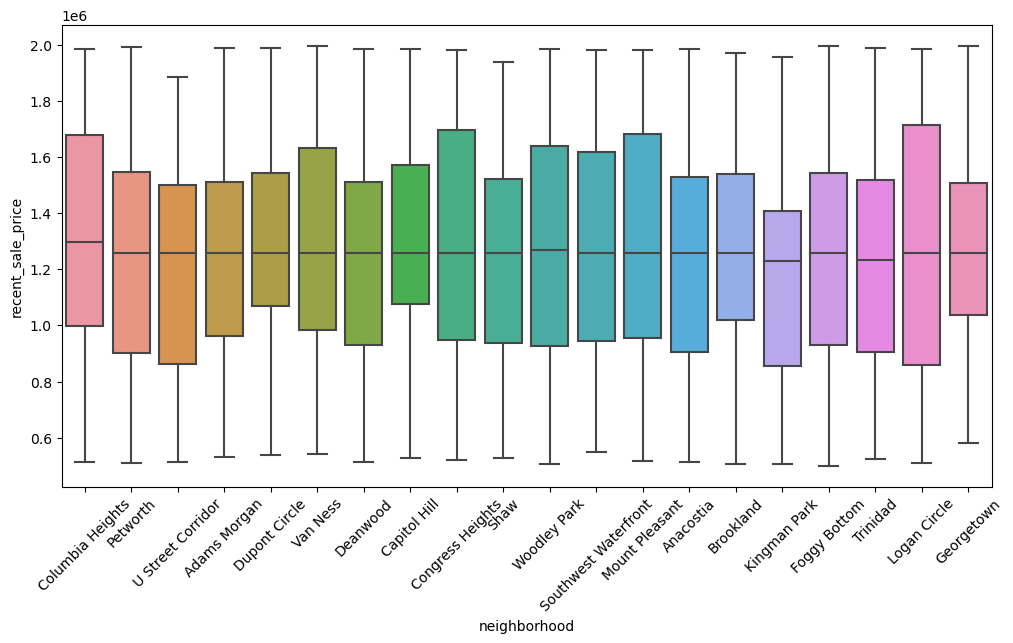

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighborhood', y='recent_sale_price', data=df)
plt.xticks(rotation=45)
plt.show()

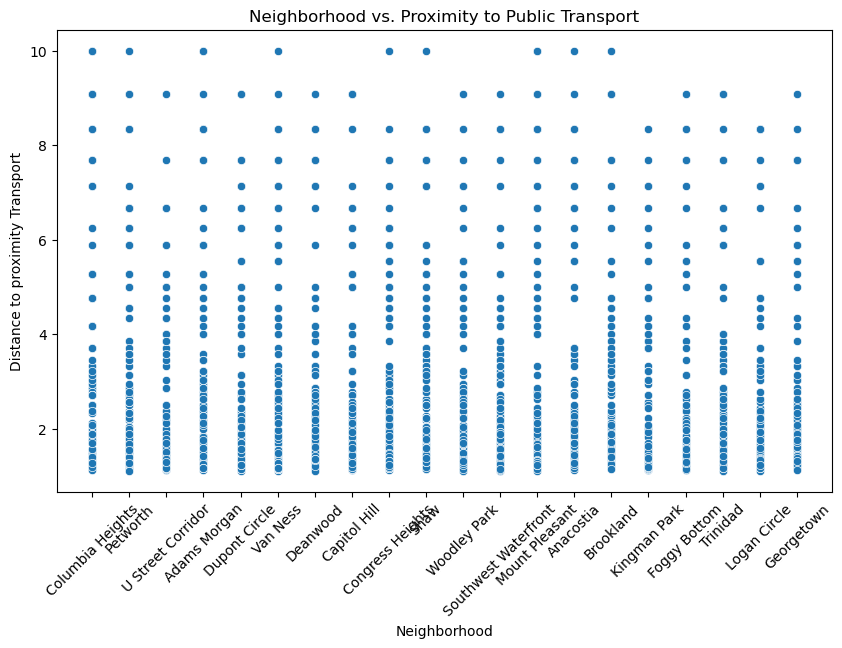

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='neighborhood', y='proximity_to_public_transport')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Distance to proximity Transport')
plt.title('Neighborhood vs. Proximity to Public Transport')
plt.show()

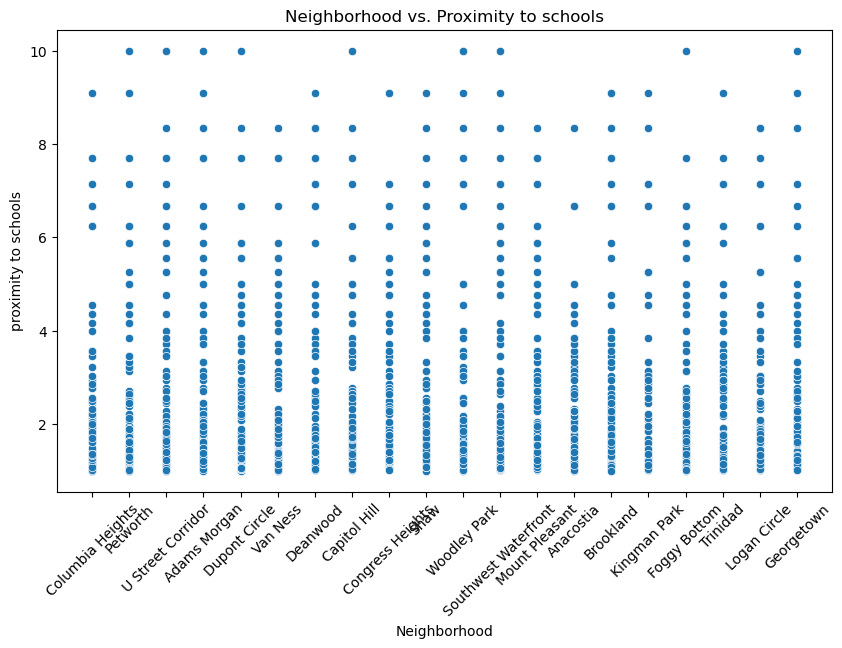

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='neighborhood', y='proximity_to_schools')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('proximity to schools')
plt.title('Neighborhood vs. Proximity to schools')
plt.show()

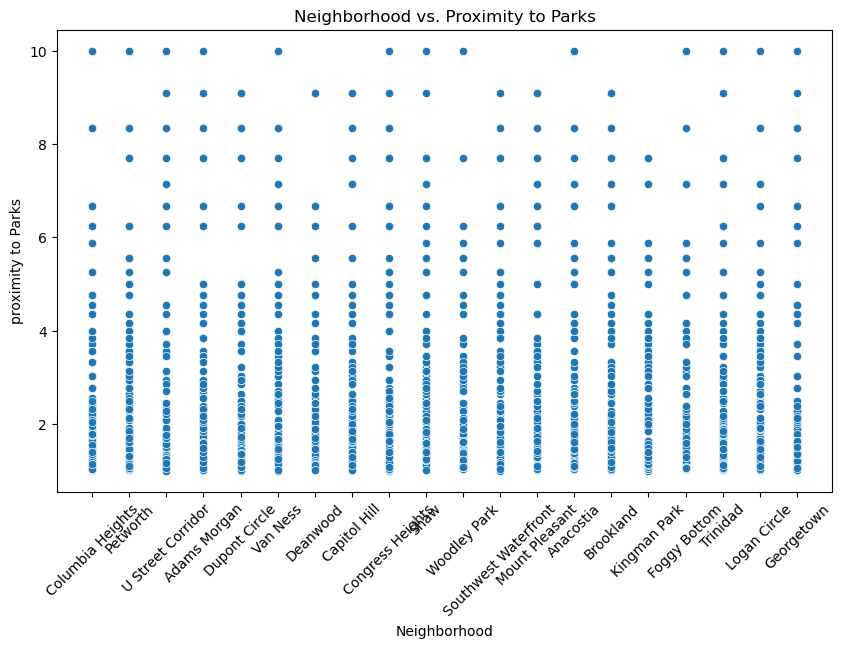

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='neighborhood', y='proximity_to_park')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('proximity to Parks')
plt.title('Neighborhood vs. Proximity to Parks')
plt.show()

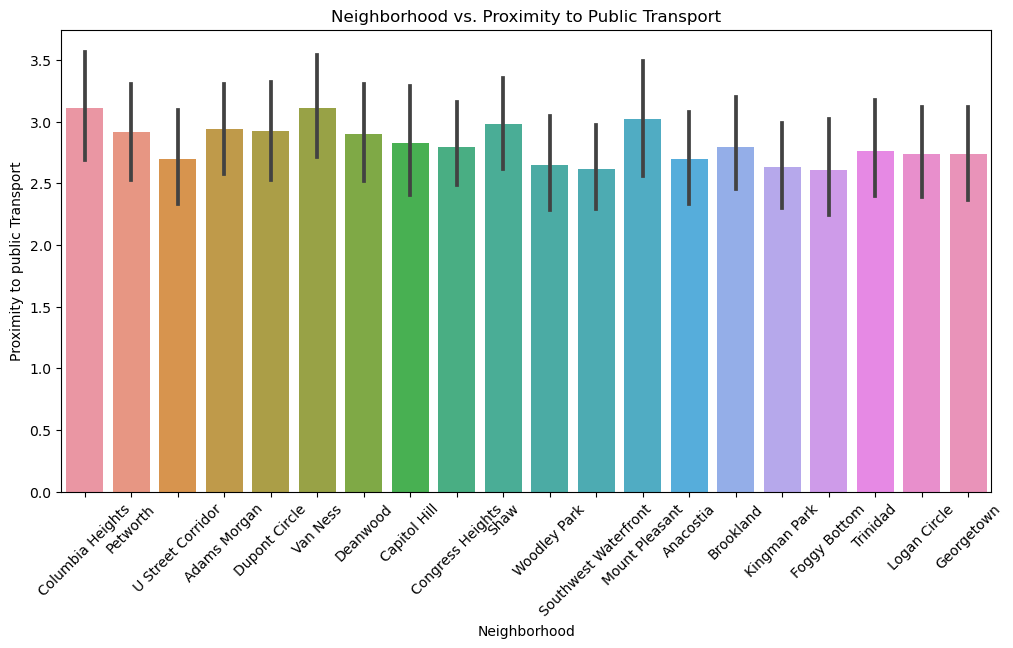

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='neighborhood', y='proximity_to_public_transport')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Proximity to public Transport')
plt.title('Neighborhood vs. Proximity to Public Transport')
plt.show()

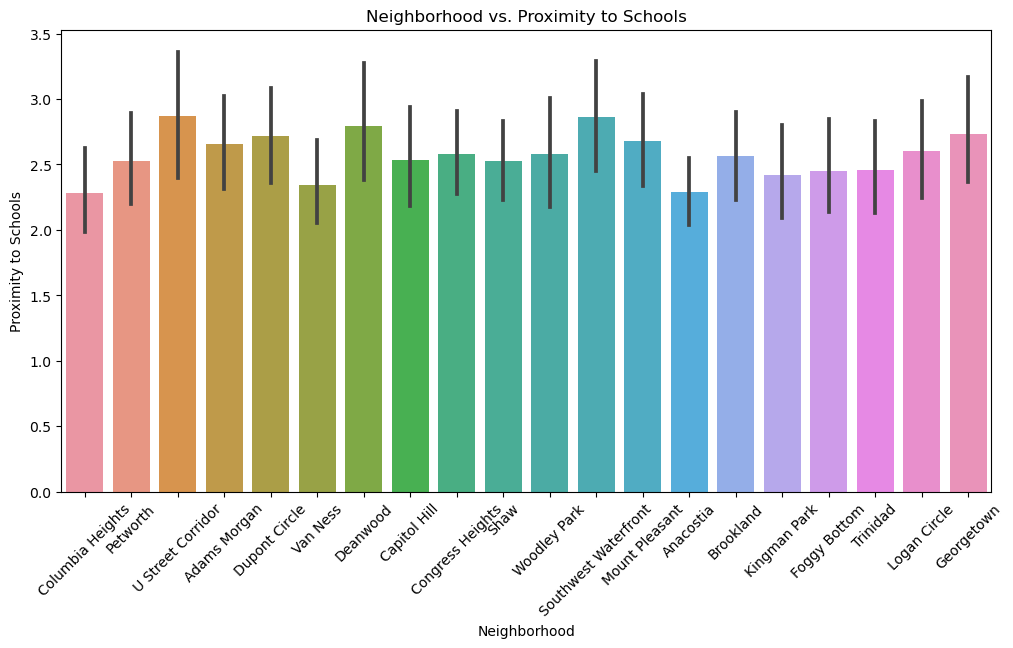

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='neighborhood', y='proximity_to_schools')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Proximity to Schools')
plt.title('Neighborhood vs. Proximity to Schools')
plt.show()

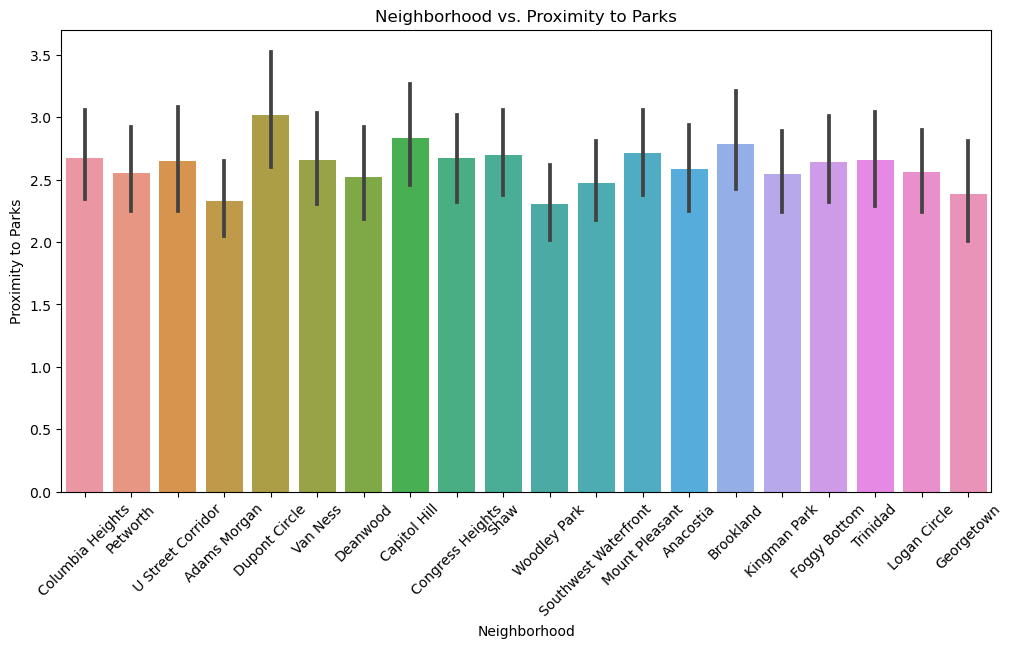

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='neighborhood', y='proximity_to_park')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Proximity to Parks')
plt.title('Neighborhood vs. Proximity to Parks')
plt.show()

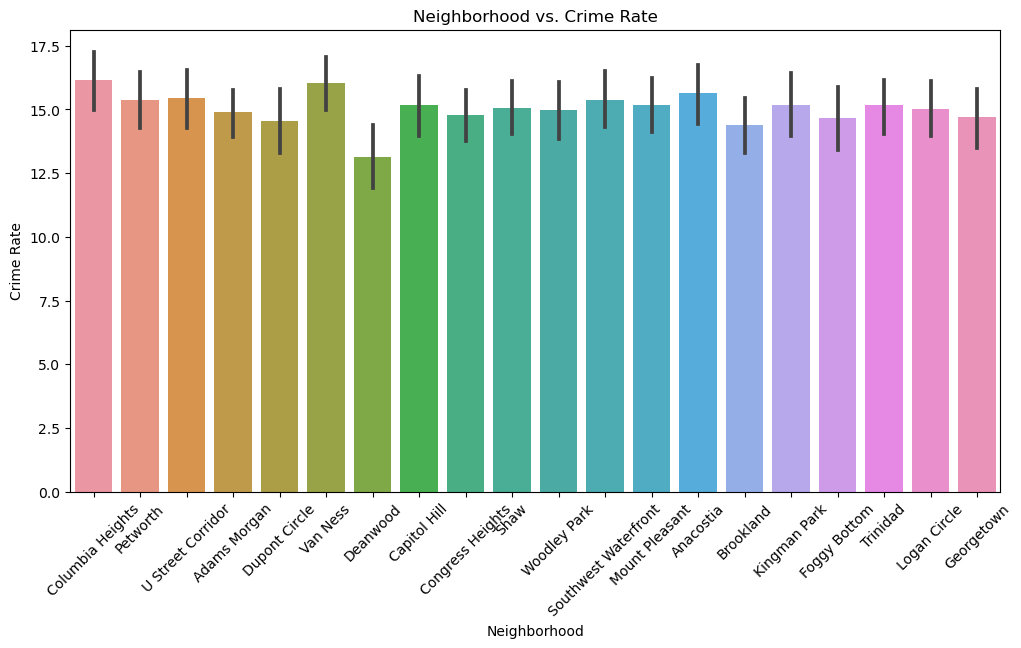

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='neighborhood', y='crime_rate')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate')
plt.title('Neighborhood vs. Crime Rate')
plt.show()

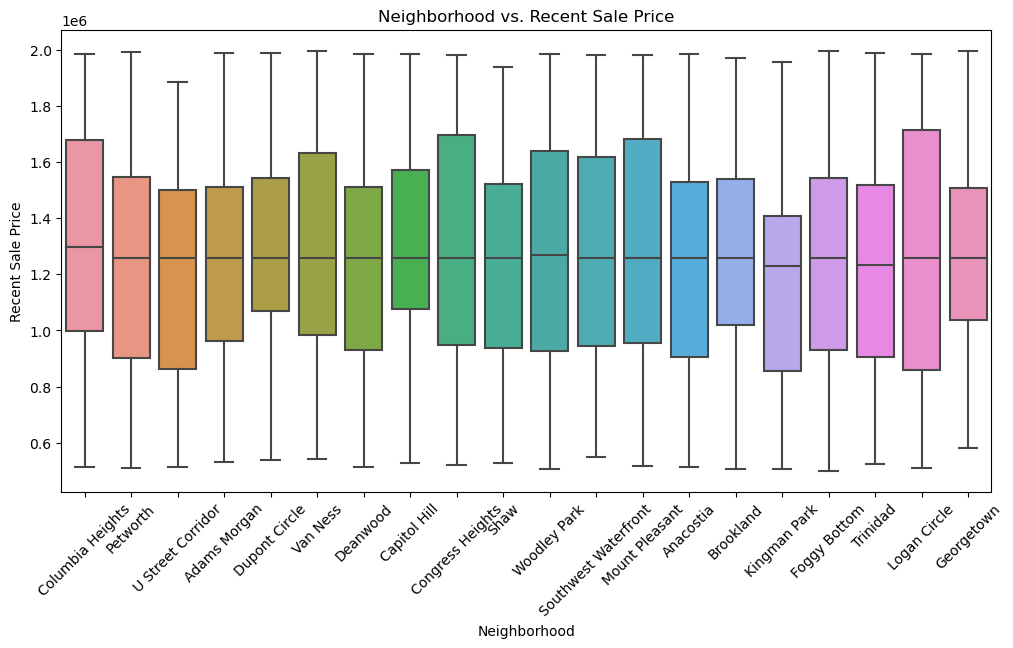

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='neighborhood', y='recent_sale_price')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Recent Sale Price')
plt.title('Neighborhood vs. Recent Sale Price')
plt.show()

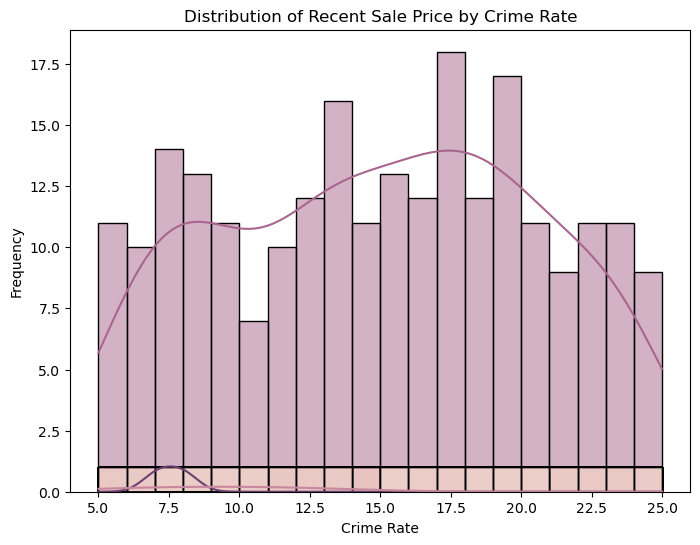

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='crime_rate', bins=20, kde=True, hue='recent_sale_price', legend=False)
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Recent Sale Price by Crime Rate')
plt.show()

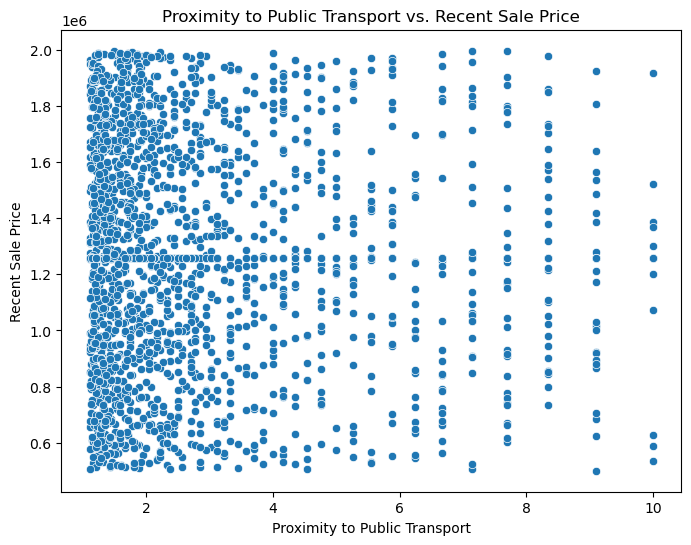

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='proximity_to_public_transport', y='recent_sale_price')
plt.xlabel('Proximity to Public Transport')
plt.ylabel('Recent Sale Price')
plt.title('Proximity to Public Transport vs. Recent Sale Price')
plt.show()

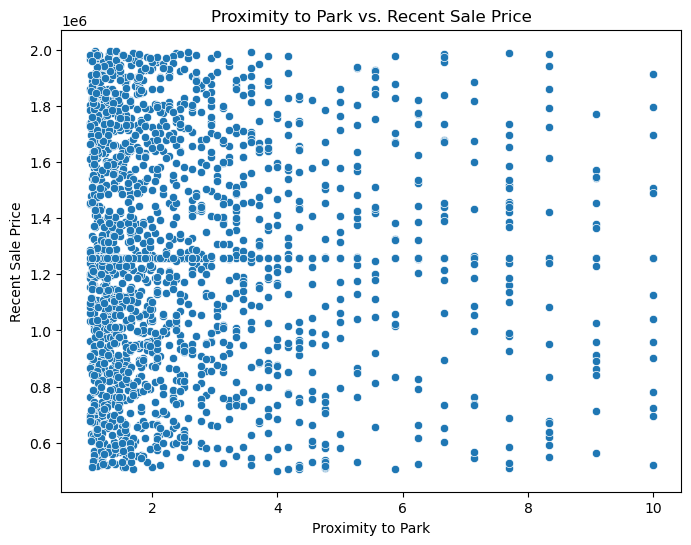

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='proximity_to_park', y='recent_sale_price')
plt.xlabel('Proximity to Park')
plt.ylabel('Recent Sale Price')
plt.title('Proximity to Park vs. Recent Sale Price')
plt.show()

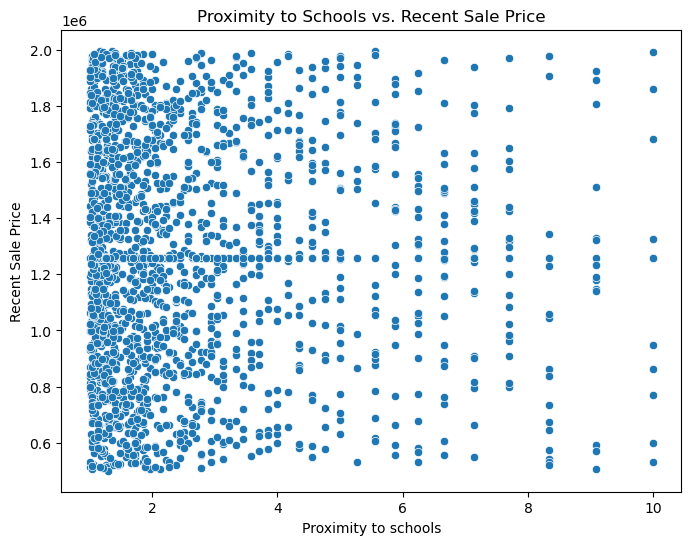

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='proximity_to_schools', y='recent_sale_price')
plt.xlabel('Proximity to schools')
plt.ylabel('Recent Sale Price')
plt.title('Proximity to Schools vs. Recent Sale Price')
plt.show()

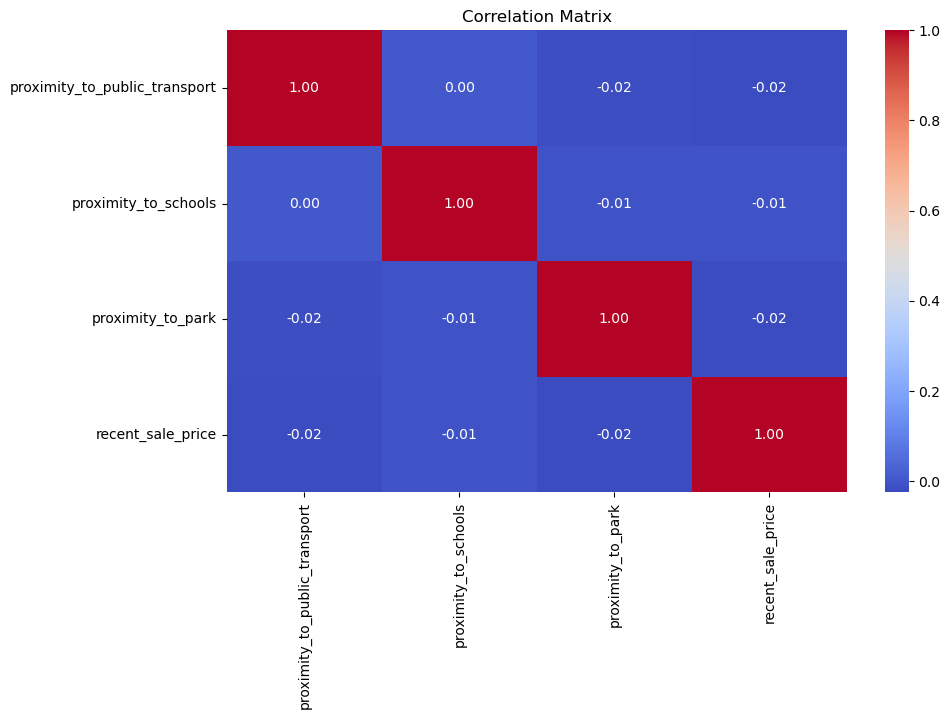

In [37]:
correlation_matrix = df[['proximity_to_public_transport', 'proximity_to_schools', 'proximity_to_park', 'recent_sale_price']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

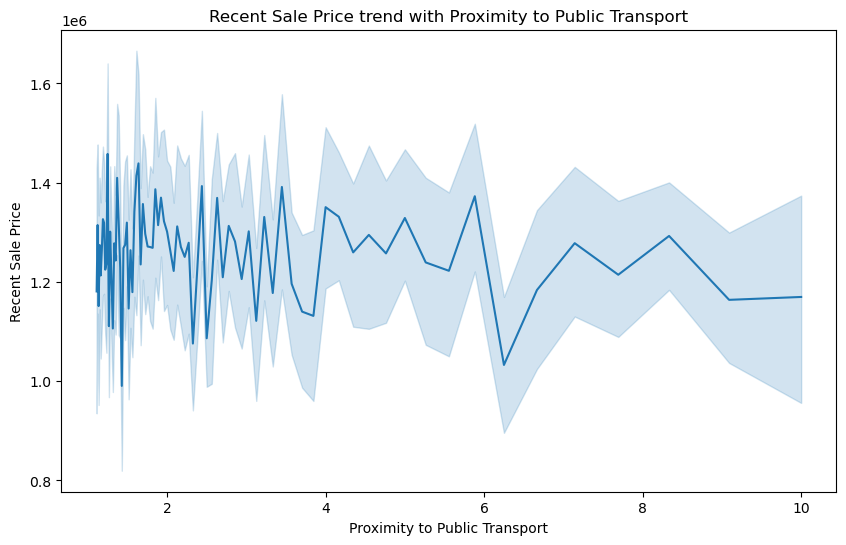

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='proximity_to_public_transport', y='recent_sale_price')
plt.title('Recent Sale Price trend with Proximity to Public Transport')
plt.xlabel('Proximity to Public Transport')
plt.ylabel('Recent Sale Price')
plt.show()

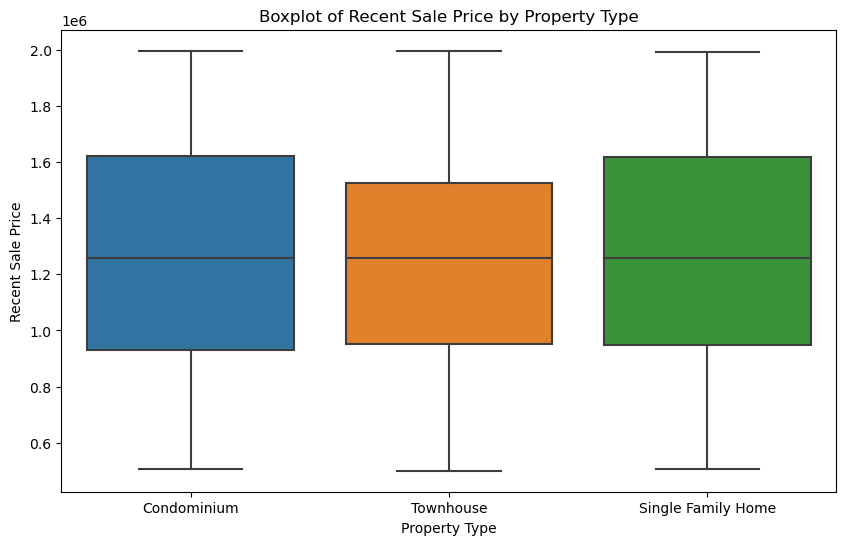

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='property_type', y='recent_sale_price')
plt.title('Boxplot of Recent Sale Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Recent Sale Price')
plt.show()

In [41]:
import statsmodels.api as sm
df['interaction_term'] = df['avg_size'] * df['crime_rate']


X = df[['avg_size', 'crime_rate', 'interaction_term']]  
X = sm.add_constant(X) 
y = df['recent_sale_price'] 

model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      recent_sale_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3250
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.807
Time:                        14:38:52   Log-Likelihood:                -28647.
No. Observations:                2000   AIC:                         5.730e+04
Df Residuals:                    1996   BIC:                         5.732e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.355e+06   1.61e+05  

In [42]:
df['interaction_term'] = df['avg_size'] * df['units'] 


X = df[['avg_size', 'units', 'interaction_term']] 
X = sm.add_constant(X) 
y = df['recent_sale_price'] 


model = sm.OLS(y, X).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      recent_sale_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5348
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.658
Time:                        14:39:36   Log-Likelihood:                -28646.
No. Observations:                2000   AIC:                         5.730e+04
Df Residuals:                    1996   BIC:                         5.732e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.405e+06   1.32e+05  

In [43]:
df['interaction_term'] = df['avg_size'] * df['proximity_to_public_transport']  


X = df[['avg_size', 'proximity_to_public_transport', 'interaction_term']]  
X = sm.add_constant(X) 
y = df['recent_sale_price'] 


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      recent_sale_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.511
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.210
Time:                        14:40:21   Log-Likelihood:                -28645.
No. Observations:                2000   AIC:                         5.730e+04
Df Residuals:                    1996   BIC:                         5.732e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [44]:
df['interaction_term'] = df['avg_size'] * df['proximity_to_schools'] 


X = df[['avg_size', 'proximity_to_schools', 'interaction_term']]  
X = sm.add_constant(X)  
y = df['recent_sale_price']  

model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      recent_sale_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05726
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.982
Time:                        14:41:10   Log-Likelihood:                -28647.
No. Observations:                2000   AIC:                         5.730e+04
Df Residuals:                    1996   BIC:                         5.732e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.275e+06 

In [45]:
df['interaction_term'] = df['avg_size'] * df['proximity_to_park']  # Example interaction term


X = df[['avg_size', 'proximity_to_park', 'interaction_term']]  
X = sm.add_constant(X) 
y = df['recent_sale_price']  


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      recent_sale_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7863
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.501
Time:                        14:42:25   Log-Likelihood:                -28646.
No. Observations:                2000   AIC:                         5.730e+04
Df Residuals:                    1996   BIC:                         5.732e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.195e+06   9.99e+0

In [46]:
df['interaction_term'] = df['avg_size'] * df['year_built'] 

#
X = df[['avg_size', 'year_built', 'interaction_term']]  
X = sm.add_constant(X)  
y = df['recent_sale_price']  


model = sm.OLS(y, X).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      recent_sale_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5246
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.665
Time:                        14:43:36   Log-Likelihood:                -28646.
No. Observations:                2000   AIC:                         5.730e+04
Df Residuals:                    1996   BIC:                         5.732e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.498e+06   5.83e+06  

In [47]:
X = df[['units', 'avg_size', 'proximity_to_public_transport', 'proximity_to_schools', 'proximity_to_park' , 'year_built', 'crime_rate']]
y = df['recent_sale_price']
X = sm.add_constant(X)
model_ols = sm.OLS(y, X).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:      recent_sale_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6534
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.712
Time:                        14:44:03   Log-Likelihood:                -28645.
No. Observations:                2000   AIC:                         5.731e+04
Df Residuals:                    1992   BIC:                         5.735e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Intercept: 2311731.2558424883
Coefficients: [  254.52884932    -8.43920409 -5056.95137369 -1869.97487086
 -5359.61458293  -520.20246051  1168.52999991]
R-squared: 0.002290983330701102
Mean Absolute Error: 329028.3925519143
Mean Squared Error: 161379536155.98718


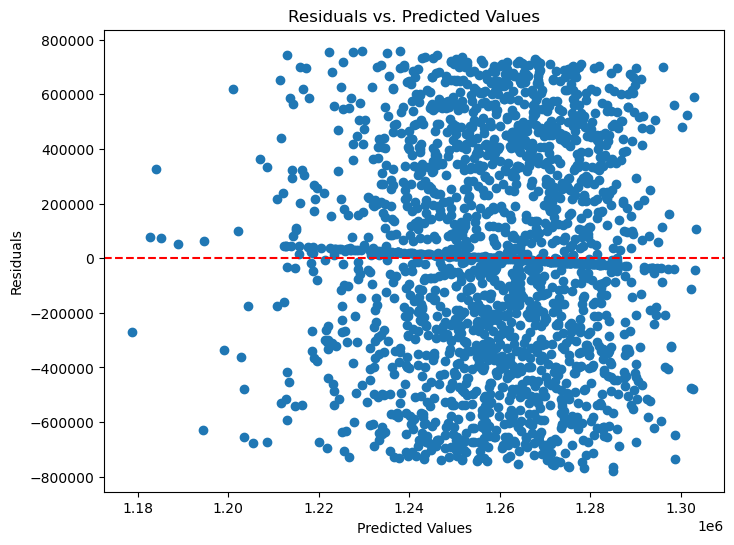

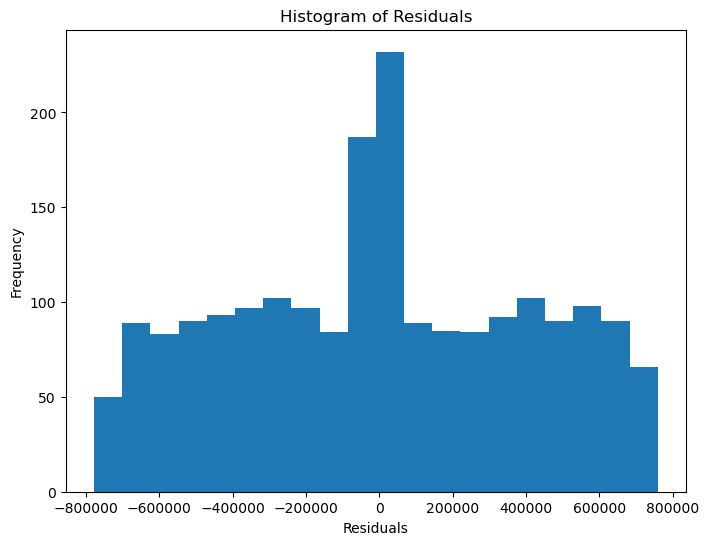

In [48]:
from sklearn.linear_model import LinearRegression

X = df[['units', 'avg_size', 'proximity_to_public_transport', 'proximity_to_schools', 'proximity_to_park' , 'year_built', 'crime_rate']]
y = df['recent_sale_price']


model_multiple_linear_regression = LinearRegression()
model_multiple_linear_regression.fit(X, y)


print('Intercept:', model_multiple_linear_regression.intercept_)
print('Coefficients:', model_multiple_linear_regression.coef_)

from sklearn.metrics import r2_score


predictions = model_multiple_linear_regression.predict(X)


r_squared = r2_score(y, predictions)


print('R-squared:', r_squared)


from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(y, predictions)


mse = mean_squared_error(y, predictions)


print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)



residuals = y - predictions


plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [49]:
from sklearn.neural_network import MLPRegressor


X = df[['units', 'avg_size', 'proximity_to_public_transport', 'proximity_to_schools', 'proximity_to_park' , 'year_built', 'crime_rate']]
y = df['recent_sale_price']


model_neural_network = MLPRegressor()
model_neural_network.fit(X, y)


predictions = model_neural_network.predict(X)


print('Predictions:', predictions[:5])


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)


print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Predictions: [1177955.7318596  1060822.2426683  1004109.72673554 1074555.1025779
  949798.59092332]
Mean Absolute Error: 372307.02507500653
Mean Squared Error: 201632081766.75854
R-squared: -0.24656539992808058


D:\PYTHON - ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
from sklearn.ensemble import RandomForestRegressor


X = df[['units', 'avg_size', 'proximity_to_public_transport', 'proximity_to_schools', 'proximity_to_park' , 'year_built', 'crime_rate']]
y = df['recent_sale_price']


model_random_forest = RandomForestRegressor()
model_random_forest.fit(X, y)


print('Feature Importances:', model_random_forest.feature_importances_)

Feature Importances: [0.12067753 0.16536733 0.13718837 0.14328238 0.13819913 0.13833433
 0.15695093]


In [51]:
predictions = model_random_forest.predict(X)


print('Predictions:', predictions[:5])

Predictions: [1529925.82591373 1268169.82015891  856610.38744608 1153857.84744608
 1641818.25897843]


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Absolute Error: 125460.39180975029
Mean Squared Error: 23531138950.09425
R-squared: 0.8545216446754784


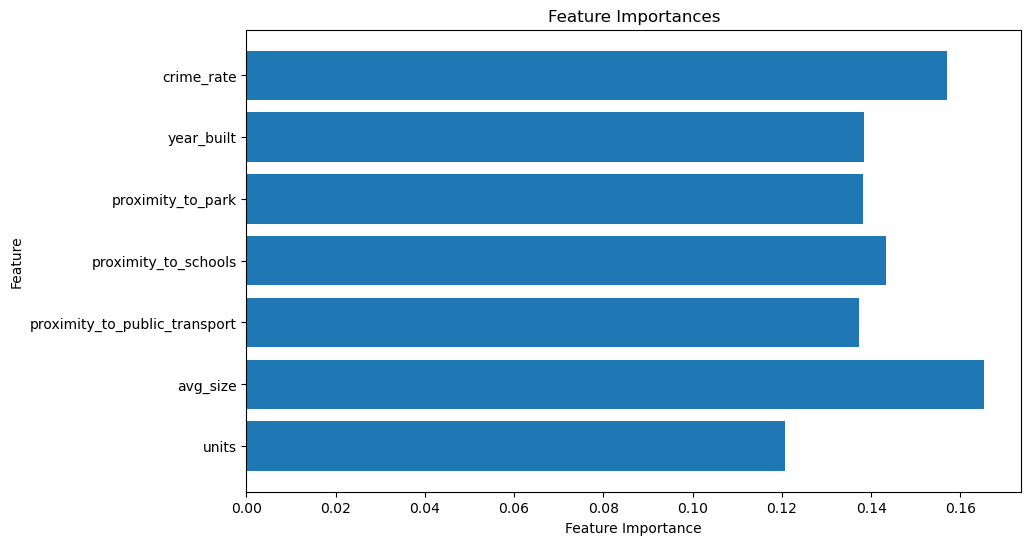

In [53]:
feature_importances = model_random_forest.feature_importances_


feature_names = ['units', 'avg_size', 'proximity_to_public_transport', 'proximity_to_schools', 'proximity_to_park' , 'year_built', 'crime_rate']


plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()